# 1. Initialize

In [1]:
# make sure qtplotter.py is in the same folder as this notebook
from qtplotter import *

print('The functions:')
print('Operation:', end = '')
print([i for i in dir(Operation) if not i.startswith('__')])
print('Data:', end = '')
print([i for i in dir(Data2d) if not i.startswith('__')])
print('Painter:', end = '')
print([i for i in dir(Painter) if not i.startswith('__')])
print('High level:', end = '')
print(['read2d', 'plot', 'play'])

The functions:
Operation:['_create_kernel', '_get_quad', 'autoflip', 'g_in_g2', 'lowpass', 'offset', 'scale', 'yderiv']
Data:['readDat', 'readMTX', 'saveMTX2d']
Painter:['get_default_ps', 'plot1d', 'plot2d', 'simpAx']
High level:['read2d', 'plot', 'play']


# 2. Interact with the data

This is easy because you don't need to customize the style.

It also provides a method to export data for 2d figures and their 1d linecuts.

(If you don't see the interactive widgets, try previewing it on https://nbviewer.jupyter.org/, or run on https://mybinder.org/)

In [2]:
url_or_path = 'https://arxiv.org/src/1912.06071v1/anc/Fig1D.mtx'
play(url_or_path)

Output()

# 3. Plot data for slides and documents

## Use `plot()` with dat and mtx files

The file can be .dat (qtlab) or .mtx (spyview, qtplot), local or online

In [16]:
help(plot)

Help on function plot in module qtplotter:

plot(fPath, **kw)
    Generate a 2d or 1d plot with customize parameters



File: datS2002_283.dat, cols: ['dac11_(G1+G3(5mV))', 'dac1_(Vbias(0.01mV))', 'keithley1 (e-6A)']


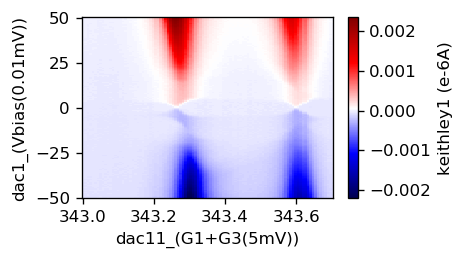

In [4]:
kw = {'cols':[1,0,3]}# the column numbers for x, y, and w (color)
plot('datS2002_283.dat',**kw)

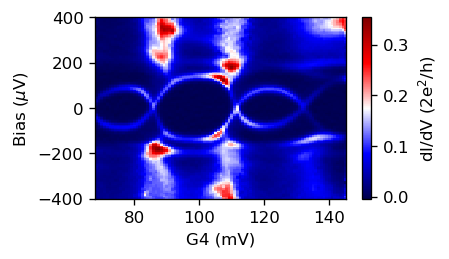

In [5]:
plot('datS1910_212.mtx')

## Customize (1)
Use the following parameters to customize labels and the colorbar.

In [6]:
Painter.get_default_ps()

{'labels': ['', '', ''],
 'useImshow': True,
 'gamma': 0,
 'gmode': 'moveColor',
 'cmap': 'seismic',
 'vmin': None,
 'vmax': None,
 'plotCbar': True}

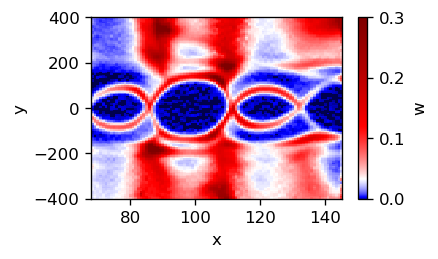

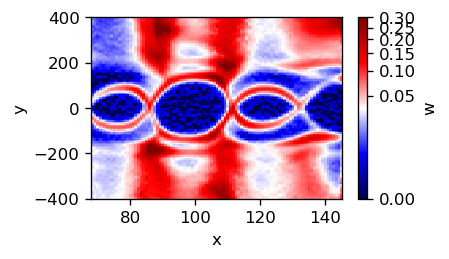

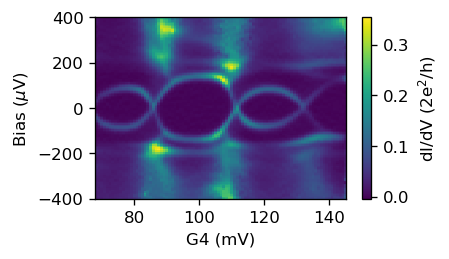

In [15]:
kw = {'labels':['x','y','w'],#labels
      'cmap':'seismic','gamma':-50,'vmin':0,'vmax':0.3}#colorbar
plot('datS1910_212.mtx',**kw)

kw['gmode'] =''
plot('datS1910_212.mtx',**kw)

# 1. cmap 2. another way to apply the parameters
plot('datS1910_212.mtx',cmap='viridis')

## Get a simpler version

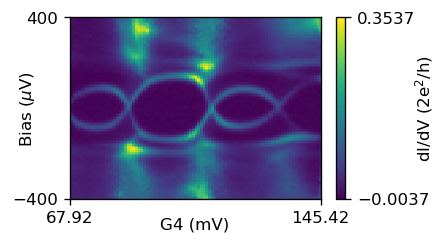

In [8]:
plot('datS1910_212.mtx',cmap='viridis')
Painter.simpAx()

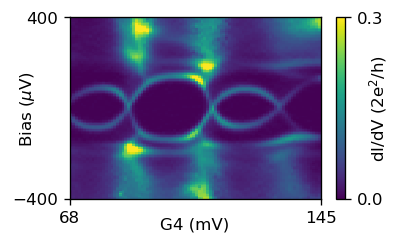

In [9]:
plot('datS1910_212.mtx',cmap='viridis')
Painter.simpAx(n=(0,0,1),pad=(-5,-15,-10))# n: precision of ax limits, pad: pad between axis and label

## Apply filters to data

In [10]:
print('Operation:', end = '')
print([i for i in dir(Operation) if not i.startswith('_')])
print()
help(Operation.g_in_g2)

Operation:['autoflip', 'g_in_g2', 'lowpass', 'offset', 'scale', 'yderiv']

Help on function g_in_g2 in module qtplotter:

g_in_g2(d, rin)
    z = z/(1-(z*Rin))/7.74809e-5. z: conductance in unit 'S', R in unit 'ohm' (SI units)



File: datS2002_283.dat, cols: ['dac11_(G1+G3(5mV))', 'dac1_(Vbias(0.01mV))', 'keithley1 (e-6A)']


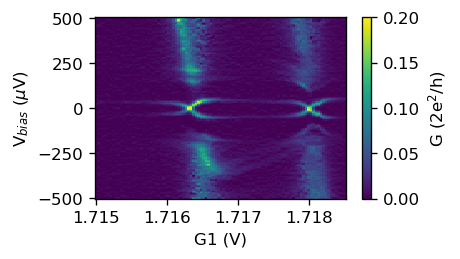

In [11]:
#The function that cooks the data
def foo(d):
    Operation.scale(d,[5e-3,0.01e-3,1e-6])#scale everything to SI units, scale(d,[s1,s2,s3,...])
    Operation.lowpass(d,0.5,0.5)
    Operation.yderiv(d)
    Operation.g_in_g2(d,4440)#recaculate conductance with Rin, in unit of 2e^2/h. g_in_g2(d,rin)
    Operation.scale(d,[1,1e6,1])#scale again to desired units
    #offset(d,[0,0])#offset(d,[off1,off2,off3,...])
    
# load and plot
kw = {'cols':[1,0,3],'cook':foo,
      'labels':['G1 (V)','V$_{bias}$ ($\mu$V)','G (2e$^2$/h)'],
      'cmap':'viridis','vmin':0,'vmax':0.2}
plot(r'datS2002_283.dat',**kw)

## Subtract $V_{Rin}$ from $V_{bias}$

Use `'useImshow':False` so `pcolormesh()` is used instead of `imshow()`.

File: data_147.dat, cols: ['dac2_(Bg(*5 mV))', 'dac1_(Vbias(0.01mV))', '2e2/h', 'keithley1 (*1e-6A)']


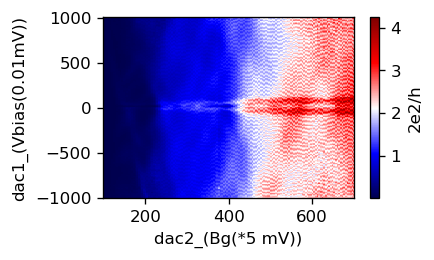

In [12]:
kw = {'cols':[1,0,7,3]}#import 4 columns instead of 3, (dac2,dac1,calculated di/dv,dc current)
plot(r'data_147.dat',**kw)

File: data_147.dat, cols: ['dac2_(Bg(*5 mV))', 'dac1_(Vbias(0.01mV))', '2e2/h', 'keithley1 (*1e-6A)']


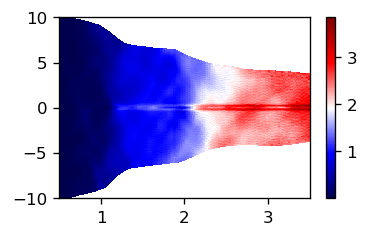

In [13]:
def foo(d):
    Operation.scale(d,[5e-3,0.01e-3,1,1e-6])# Scale to SI unit. d=(d1,d2,d3,d4), s=(s1,s2,s3,s4)
    Operation.lowpass(d,0.5,1)
    d[1] -= 7100*d[3]# rin=7100 ohm
    Operation.scale(d,[1,1000])# Scale to desired unit
kw = {'cols':[1,0,7,3],'cook':foo,'useImshow':False,'labels':['','','']}
plot(r'data_147.dat',**kw)

## Customize (2)
It requires some knowledge of Python and Matplotlib library

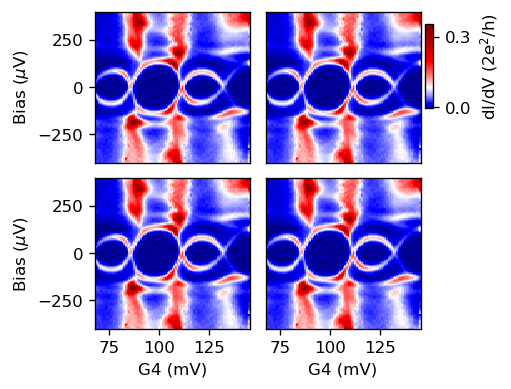

In [14]:
ny,nx = 2,2
fig, axs = plt.subplots(ny,nx,dpi=120,figsize=(3.5,3.5))
plt.subplots_adjust(hspace=0.1,wspace=0.1)
for i,axi in zip([212,212,212,212],axs.ravel()):
    plot('datS1910_%d.mtx'%i,ax=axi,fig=fig,plotCbar=False,gamma=-30)

for i in range(ny):
    for j in range(nx):
        if i != ny-1:
            axs[i,j].set_xticks([])
            axs[i,j].set_xlabel('')
        if j != 0:
            axs[i,j].set_yticks([])
            axs[i,j].set_ylabel('')

cax = fig.add_axes([0.91,0.65,0.02,0.2])
im = [obj for obj in axs[0,0].get_children() if isinstance(obj, mpl.image.AxesImage) or isinstance(obj,mpl.collections.QuadMesh)][0]
# make sure all panels have the same colorscale as you only plot one colorbar!
fig.colorbar(im,cax=cax,ticks=[0,0.3],label='dI/dV (2e$^2$/h)')